In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    e = y-tx.dot(w)
    
    return np.sum(e*e)*1/(2*len(y))

#print(compute_loss(y,tx,np.array([1,2])))


# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    for i, z0 in enumerate(w0):
        for j, z1 in enumerate(w1):
            losses[i,j] = compute_loss(y,tx,np.array([z0,z1]))
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=11.160 seconds


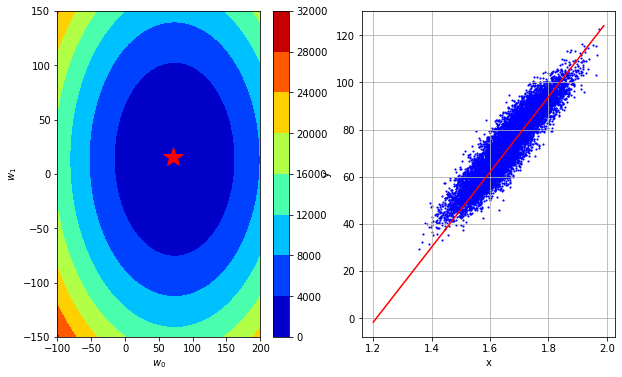

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    
    return -1/len(y) * np.transpose(tx).dot(y-tx.dot(w))

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        loss = compute_loss(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        w = w - gamma*compute_gradient(y,tx,w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [21]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 2.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=183.23480500526298, w1=33.69928108747244
Gradient Descent(1/49): loss=6263.300243872087, w0=-91.61740250263145, w1=-16.84964054373573
Gradient Descent(2/49): loss=14073.193188876141, w0=320.66090875921, w1=58.97374190307576
Gradient Descent(3/49): loss=31645.452315135215, w0=-297.75655813355183, w1=-54.76133176714029
Gradient Descent(4/49): loss=71183.03534921809, w0=629.8696422055906, w1=115.84127873818201
Gradient Descent(5/49): loss=160142.59717590446, w0=-761.5696583031221, w1=-140.06263701979898
Gradient Descent(6/49): loss=360301.61128594814, w0=1325.5892924599457, w1=243.79323661716873
Gradient Descent(7/49): loss=810659.3930335463, w0=-1805.1491336846539, w1=-331.9905738382772
Gradient Descent(8/49): loss=1823964.4019656386, w0=2890.9585055322423, w1=531.6851418448829
Gradient Descent(9/49): loss=4103900.672062844, w0=-4153.202953293099, w1=-763.828431679843
Gradient Descent(10/49): loss=9233757.27978155, w0=6413.03923494491, 

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

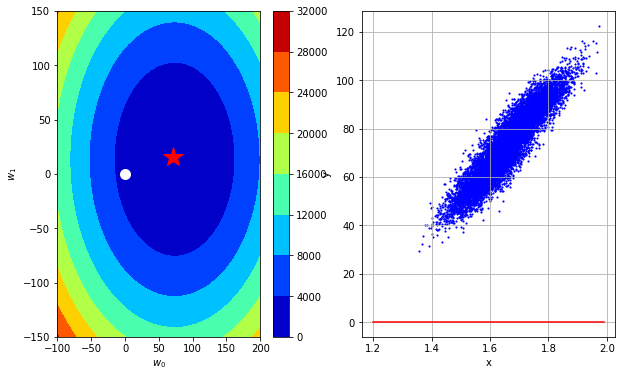

In [22]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [37]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    
    return np.transpose(tx).dot(y-tx.dot(w))

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    ws = [initial_w]
    losses = []
    w = initial_w
    for y_b, tx_b in batch_iter(y, tx, batch_size, max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        loss = compute_loss(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        w = w - gamma*compute_stoch_gradient(y_b,tx_b,w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=0, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws

In [38]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2792.2367127591674, w0=-63.18420409863438, w1=-59.61335715444781
Stochastic Gradient Descent(0/49): loss=11999.823750856633, w0=-97.52227357466685, w1=-19.093496849675233
Stochastic Gradient Descent(0/49): loss=15134.979205081112, w0=-250.75211979725745, w1=-248.24471741626516
Stochastic Gradient Descent(0/49): loss=86768.14308126793, w0=-471.7613855140384, w1=-238.2947239622634
Stochastic Gradient Descent(0/49): loss=180253.21342520465, w0=-1143.5142527957985, w1=-1359.8070380263243
Stochastic Gradient Descent(0/49): loss=1683284.7025116668, w0=-1566.3716658832514, w1=-1169.4575655537624
Stochastic Gradient Descent(0/49): loss=2043937.3077633006, w0=-2156.996882279174, w1=-774.2097611925185
Stochastic Gradient Descent(0/49): loss=2797341.2751504737, w0=-3858.25668363769, w1=-1188.0244301703053
Stochastic Gradient Descent(0/49): loss=8450366.570590025, w0=-7808.570847317208, w1=-6817.562625679512
Stochastic Gradient Descent(0/49): loss=54393481.2

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

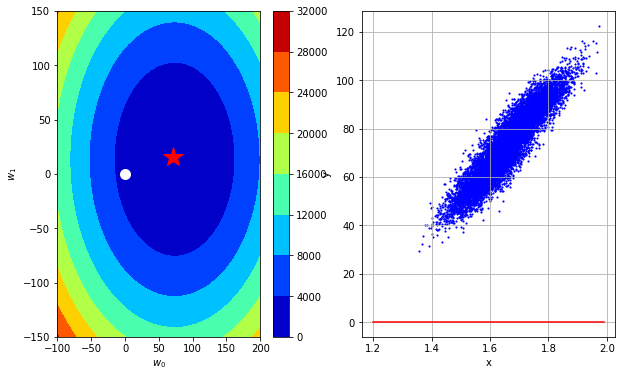

In [39]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers

### Exercise 5


# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)